# **<font color=blue>Andrés Felipe Villabona Lozada</font>**
### **<font color=blue>COD: 201727965</font>**
# **<font color=blue>Camilo Torres Rodríguez</font>**
### **<font color=blue>COD: 200714035</font>**

# Exercise 01.1

Create a function that receives two inputs a and b, and returns the product of the a decimal of pi and the b decimal of pi.

```
i.e, 
pi = 3.14159
if a = 2 and b = 4
result = 4 * 5
result = 20
```

Caveats:
- a and b are between 1 and 15
- decimals positions 1 and 2 are 1 and 4, respectively. (remember that python start indexing in 0)

# Solución

En principio, se identifica cuantos y cuales son los decimales de pi:

```
import math
pi=math.pi
pi = 3.141592653589793
```
Conociendo los valores de los decimales de pi, se crea entonces la siguiente función, que recibe dos parámetros, los cuales se usan para ubicar el decimal y posteriormente realizar su operación:

In [6]:
from math import pi
def mult_dec_pi(a, b):  
        decimal_of_pi = [".",1,4,1,5,9,2,6,5,3,5,8,9,7,9,3]
        if a >= 16 or b >= 16 or a <= 0 or b <= 0:
            print("'Error'")            
        else:  
            x = decimal_of_pi[a]
            y = decimal_of_pi[b]   
            result = x * y
            return result

A continuación, se prueba la función, y se verifica que el resultado sea el esperado:

In [7]:
mult_dec_pi(a=2, b=4)
# 20.0

20

In [8]:
mult_dec_pi(a=5, b=10)
# 45.0

45

In [9]:
mult_dec_pi(a=14, b=1)
# 9.0

9

In [10]:
mult_dec_pi(a=6, b=8)
# 10.0

10

In [11]:
# Bonus
mult_dec_pi(a=16, b=4)
# 'Error'

'Error'


# Exercise 01.2

Using the given dataset. Estimate a linear regression between Employed and GNP.

$$Employed = b_0 + b_1 * GNP $$

$$\hat b = (X^TX)^{-1}X^TY$$
$$Y = Employed$$
$$X = [1  \quad GNP]$$

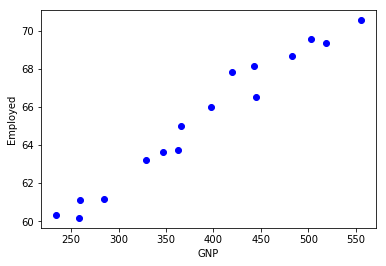

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Import data
raw_data = """
Year,Employed,GNP
1947,60.323,234.289
1948,61.122,259.426
1949,60.171,258.054
1950,61.187,284.599
1951,63.221,328.975
1952,63.639,346.999
1953,64.989,365.385
1954,63.761,363.112
1955,66.019,397.469
1956,67.857,419.18
1957,68.169,442.769
1958,66.513,444.546
1959,68.655,482.704
1960,69.564,502.601
1961,69.331,518.173
1962,70.551,554.894"""

data = []
for line in raw_data.splitlines()[2:]:
    words = line.split(',')
    data.append(words)
data = np.array(data, dtype=np.float)
n_obs = data.shape[0]
plt.plot(data[:, 2], data[:, 1], 'bo')
plt.xlabel("GNP")
plt.ylabel("Employed")

# Solución

Para estimar la regresión lineal entre Employed y GNP, se crea un nuevo data frame y se asignan las variable a los objetos X y Y:

In [13]:
import numpy as np
import pandas as pd
y = data[:, 1]
X = data[:, 2]
df = pd.DataFrame({'GNP':X, 'Employed':y})
df.head(5)

,Employed,GNP
0,60.323,234.289
1,61.122,259.426
2,60.171,258.054
3,61.187,284.599
4,63.221,328.975


Usando la librería sklearn se crea el modelo de regresión lineal “Linreg”:

In [14]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept=True)
y = df['Employed']
X = df['GNP']

In [15]:
linreg.fit(X.values.reshape(-1,1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Se realiza la predicción de “Employed” con el modelo creado, y se grafica el resultado sobre los datos:

In [16]:
y_pred= linreg.predict(X.values.reshape(-1,1))

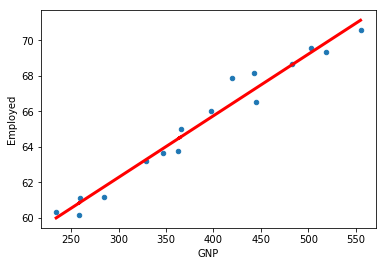

In [17]:
df.plot('GNP', 'Employed', kind='scatter')
plt.plot(X.values.reshape(-1,1), y_pred, color='red', linewidth=3)

# Exercise 01.3

Analyze the baby names dataset using pandas

In [19]:
import pandas as pd
# Load dataset
import zipfile
with zipfile.ZipFile('C:/Users/avill/Downloads/DeepLearning/AppliedDeepLearningClass-master/datasets/baby-names2.csv.zip', 'r') as z:
    f = z.open('baby-names2.csv')
    names = pd.io.parsers.read_table(f, sep=',')

In [20]:
names.head()

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620


In [21]:
names[names.year == 1993].head()   

,year,name,prop,sex,soundex
113000,1993,Michael,0.024010,boy,M240
113001,1993,Christopher,0.018572,boy,C623
113002,1993,Matthew,0.017332,boy,M300
113003,1993,Joshua,0.016268,boy,J200
113004,1993,Tyler,0.014439,boy,T460


### segment the data into boy and girl names

In [22]:
boys = names[names.sex == 'boy'].copy()    
girls = names[names.sex == 'girl'].copy()

### Analyzing the popularity of a name over time

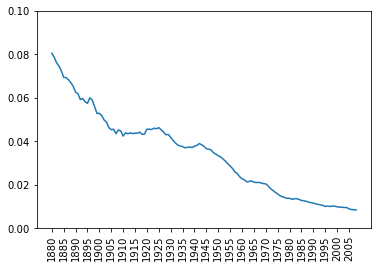

In [23]:
william = boys[boys['name']=='William']

plt.plot(range(william.shape[0]), william['prop'])
plt.xticks(range(william.shape[0])[::5], william['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.1])
plt.show()

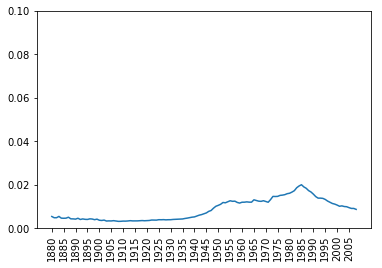

In [24]:
Daniel = boys[boys['name']=='Daniel']

plt.plot(range(Daniel.shape[0]), Daniel['prop'])
plt.xticks(range(Daniel.shape[0])[::5], Daniel['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.1])
plt.show()

# Exercise 01.3

Which has been the most popular boy name every decade?

# Solución

Para identificar cuales fueron los nombres más populares en cada una de las décadas de la base de datos, se crea la siguiente función, la cual filtra la base de datos “boys” con los parámetros de años seleccionados, luego calcula la frecuencia de cada nombre sobre la nueva base, e imprime cinco de los nombres con mayor frecuencia:

In [25]:
def names_decade(AI, AF):   
    boys1 = boys[boys.year >= AI]
    boys2 = boys1[boys.year <= AF]
    names = pd.DataFrame(boys2['name'].value_counts() == max(boys2['name'].value_counts()))
    names.drop(names.columns[[0]], axis=1, inplace=True)
    return names.head(5)
import warnings
warnings.filterwarnings("ignore")

A continuación, se prueba la función, filtrando la base por décadas, y se imprimen cinco de los nombres más populares: 

In [26]:
names_decade(AI=1880, AF=1890)

""
Wilbur
Charles
Jean
Joe
Royal


In [27]:
names_decade(1890, 1900)

""
Addison
Avery
Christian
Levi
Byron


In [28]:
names_decade(1900, 1910)

""
Ezra
Arther
Morton
Seymour
Everett


In [29]:
names_decade(1910, 1920)

""
Jim
Emerson
Columbus
Johnnie
Alton


In [30]:
names_decade(1920, 1930)

""
Lambert
Lamar
King
Norwood
Evert


In [31]:
names_decade(1930, 1940)

""
Rodney
Jay
Hans
Myron
Donald


In [32]:
names_decade(1940, 1950)

""
Art
Myron
Raul
Tim
Orville


In [33]:
names_decade(1960, 1970)

""
Darren
Brien
Jay
Orville
Mitch


In [34]:
names_decade(1970, 1980)

""
Chauncey
Rhett
Arnold
Elvis
Jesse


In [35]:
names_decade(1980, 1990)

""
Osvaldo
Rudolph
Rickey
Jared
George


In [36]:
names_decade(1990, 2000)

""
Peyton
Ricardo
Ezequiel
Liam
Gabriel


In [37]:
names_decade(2000, 2010)

""
Muhammad
Johnathon
Gavin
Gerald
Lee


# Exercise 01.4

Which has been the most popular girl name?


# Solución

Similar al ejercicio anterior, para identificar cuáles fueron los nombres de niña más populares, se calcula la frecuencia de cada nombre sobre la base “girls”, se crea un nuevo data frame con los nombres más frecuentes y se imprimen cinco de ellos:

In [61]:
max(girls['name'].value_counts())

129

In [284]:
Most_popular_girls_names = pd.DataFrame(girls['name'].value_counts() == 129)
Most_popular_girls_names.drop(Most_popular_girls_names.columns[[0]], axis=1, inplace=True)
Most_popular_girls_names.head(5)

""
Paula
Virginia
Katie
Emily
Angie


# Exercise 01.5

What is the most popular new girl name? (new is a name that appears only in the 2000's)

# Solución

Por último, para identificar cuáles fueron los nuevos nombres de niña más populares, se filtra la base de datos “girls”, luego se calcula la frecuencia de cada nombre sobre la nueva base, se calcula la frecuencia de los nombres y se imprimen cinco de ellos:

In [263]:
girls2000 = girls[girls.year >= 2000].copy()

In [344]:
max(girls2000['name'].value_counts())

9

In [283]:
Most_popular_new_girls_names = pd.DataFrame(girls2000['name'].value_counts() == 9)
Most_popular_new_girls_names.drop(Most_popular_new_girls_names.columns[[0]], axis=1, inplace=True)
Most_popular_new_girls_names.head(5)

""
Allie
Kirsten
Cheyanne
Fatima
Melina
